In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv('iris.data', sep=',', names=names)
pd.set_option('display.max_rows', None)
display(df)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [93]:
df.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


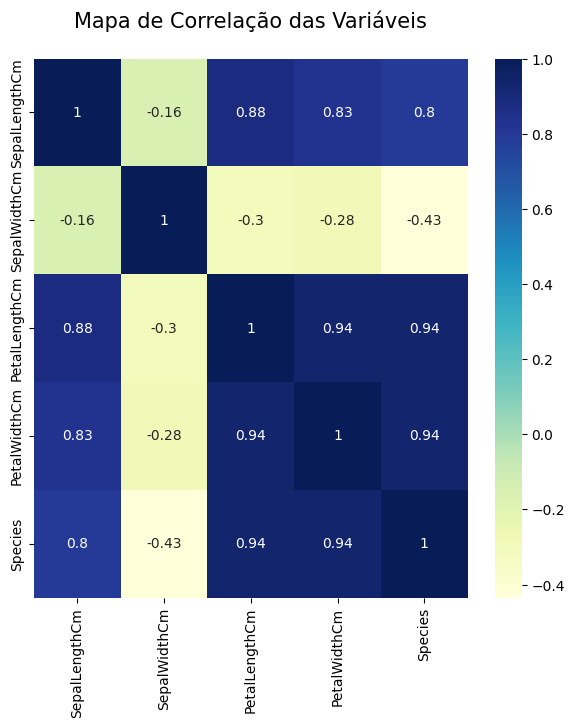

In [94]:
plt.figure(figsize = (7,7))
df['Species'] = df['Species'].astype('category').cat.codes
sns.heatmap(df.corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis\n", fontsize = 15)
plt.show()

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

class Modelo():
    def __init__(self):
        self.df = None
        self.model = None
        self.X_test = None
        self.y_test = None
        self.feature_importances = None

    def CarregarDataset(self, path):
        """
        Carrega o conjunto de dados a partir de um arquivo CSV.
        """
        names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
        self.df = pd.read_csv(path, names=names)
        print("Dataset carregado com sucesso. Exemplo de dados:")
        print(self.df.head())

    def TratamentoDeDados(self):
        """
        Realiza o pré-processamento dos dados carregados.
        """
        if self.df is None:
            print("Nenhum dataset carregado.")
            return

        print("Dados antes do tratamento:")
        print(self.df.head())

        self.df.dropna(inplace=True)
        self.df['Species'] = self.df['Species'].astype('category').cat.codes

        print("\nDados após tratamento:")
        print(self.df.head())

        # visualização da distribuição das espécies
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(self.df['SepalLengthCm'], self.df['SepalWidthCm'], c=self.df['Species'], cmap='viridis')
        plt.colorbar(scatter, label="Espécie")
        plt.xlabel("SepalLengthCm")
        plt.ylabel("SepalWidthCm")
        plt.title("Distribuição das Espécies por Comprimento e Largura da Sépala")
        plt.show()

    def Treinamento(self):
        """
        Treina o modelo de machine learning e executa validação cruzada.
        Remove colunas com baixa importância com base nas importâncias das características.
        """
        X = self.df.drop('Species', axis=1)
        y = self.df['Species']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        self.model = DecisionTreeClassifier(random_state=42)
        self.model.fit(X_train, y_train)

        scores = cross_val_score(self.model, X_train, y_train, cv=5)
        print(f"Desempenho inicial (validação cruzada): {scores.mean():.2f}")

        self.feature_importances = self.model.feature_importances_
        feature_names = X.columns

        threshold = 0.75  # importância mínima
        print("\nImportância das características:")
        for feature, importance in zip(feature_names, self.feature_importances):
            print(f"{feature}: {importance}")
        print()

        important_features = feature_names[self.feature_importances >= threshold]
        print("Colunas importantes:", important_features.tolist())

        X_train_filtered = X_train[important_features]
        X_test_filtered = X_test[important_features]
        self.model.fit(X_train_filtered, y_train)

        self.X_test = X_test_filtered
        self.y_test = y_test
        print("Modelo treinado com sucesso com colunas importantes.")

    def Teste(self):
        """
        Avalia o desempenho do modelo treinado nos dados de teste.
        """
        if self.model is None:
            print("Modelo não foi treinado.")
            return

        y_pred = self.model.predict(self.X_test)

        # Métricas de desempenho
        acuracia = accuracy_score(self.y_test, y_pred)
        print(f"Acurácia: {acuracia:.2f}")
        print("Relatório de Classificação:")
        print(classification_report(self.y_test, y_pred))

    def Train(self):
        """
        Função principal para o fluxo de treinamento do modelo.
        """
        self.CarregarDataset("iris.data")
        self.TratamentoDeDados()
        self.Treinamento()
        self.Teste()


Dataset carregado com sucesso. Exemplo de dados:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Dados antes do tratamento:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Dados após tratamento:
   SepalLengthCm  SepalW

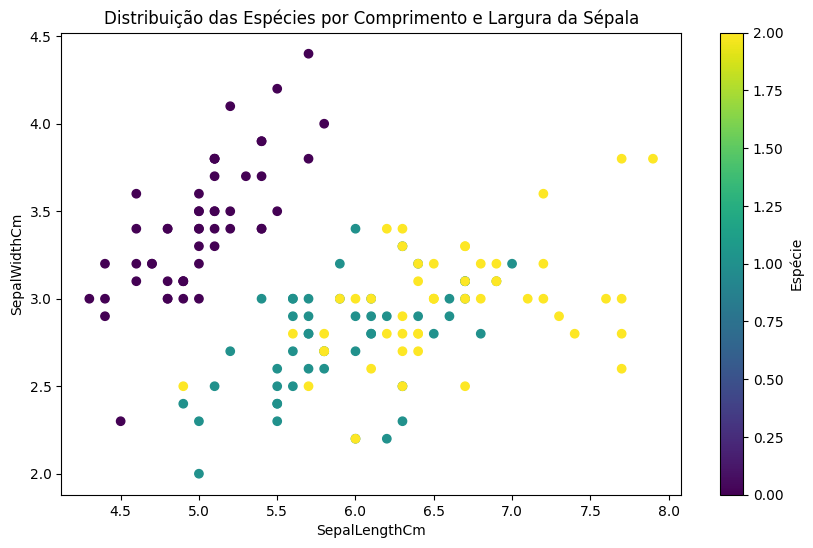

Desempenho inicial (validação cruzada): 0.93

Importância das características:
SepalLengthCm: 0.0
SepalWidthCm: 0.01911001911001911
PetalLengthCm: 0.8932635518001373
PetalWidthCm: 0.08762642908984374

Colunas importantes: ['PetalLengthCm']
Modelo treinado com sucesso com colunas importantes.
Acurácia: 0.96
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [98]:
model = Modelo()
model.Train()
